In [10]:
import nest
import numpy as np
import matplotlib.pyplot as plt

In [44]:
nest.ResetKernel()
nest.SetKernelStatus({"print_time":False})

In [45]:
#exc_pop, inh_pop = create_iaf_psc_exp(1000, 250)
modelname = 'iaf_psc_exp'
model_parameters = {
    'C_m': 250.0,
    'E_L': -70.0,
    'I_e': 380.0,
    't_ref': 2.0,
    'tau_syn_ex': 2.0,
    'tau_syn_in': 2.0,
    'V_m': nest.random.uniform(-70.0,-60.0),
    'V_reset': -70.0,
    'V_th': -55.0,
}
exc_pop = nest.Create(modelname, 100, model_parameters)
inh_pop = nest.Create(modelname, 100, model_parameters)

conn_dict_exc = {"rule": "fixed_indegree", "indegree": 10}
syn_dict_exc = {"weight": 10.0}
nest.Connect(exc_pop, exc_pop, conn_dict_exc, syn_dict_exc)
nest.Connect(exc_pop, inh_pop, conn_dict_exc, syn_dict_exc)

conn_dict_inh = {"rule": "fixed_indegree", "indegree": 30}
syn_dict_inh = {"weight": -10.0}
nest.Connect(inh_pop,exc_pop, conn_dict_inh, syn_dict_inh)
nest.Connect(inh_pop,exc_pop, conn_dict_inh, syn_dict_inh)

In [46]:
sd_exc = nest.Create('spike_recorder')
sd_inh = nest.Create('spike_recorder')
nest.Connect(exc_pop,sd_exc)
nest.Connect(inh_pop,sd_inh)
recordables = nest.GetDefaults(modelname)['recordables']

mm = nest.Create('multimeter',{'record_from': recordables})
nest.Connect(mm,exc_pop[0])

In [47]:
sim_time = 1000 #ms
nest.Simulate(sim_time)


Nov 02 01:00:55 NodeManager::prepare_nodes [Info]: 
    Preparing 203 nodes for simulation.

Nov 02 01:00:55 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 203
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 02 01:00:55 SimulationManager::run [Info]: 
    Simulation finished.


Text(0, 0.5, 'Firing rate (Hz)')

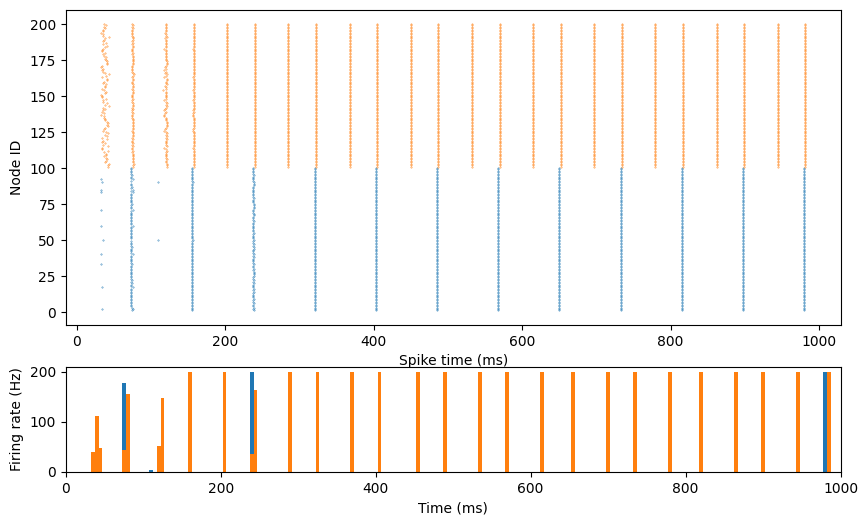

In [48]:
f, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]},figsize = (10,6))
for counter, sd in enumerate([sd_exc,sd_inh]):
    senders = sd.events['senders']
    num_senders = (1+max(senders)-min(senders))
    axs[0].scatter(sd.events['times'], senders,s=0.1)
#     axs[0].set_xlim(-250,3250)
    binwidth=5 #ms
    bins = np.arange(0,sim_time,binwidth)
    counts, bins = np.histogram(sd.events['times'],bins)
    axs[1].bar(bins[1:],counts*1000/binwidth/(1+max(senders)-min(senders)), width = binwidth)
    axs[1].set_xlim(0,sim_time)
#     axs[1].set_ylim(0,14)
axs[0].set_ylabel('Node ID')
axs[0].set_xlabel('Spike time (ms)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Firing rate (Hz)')

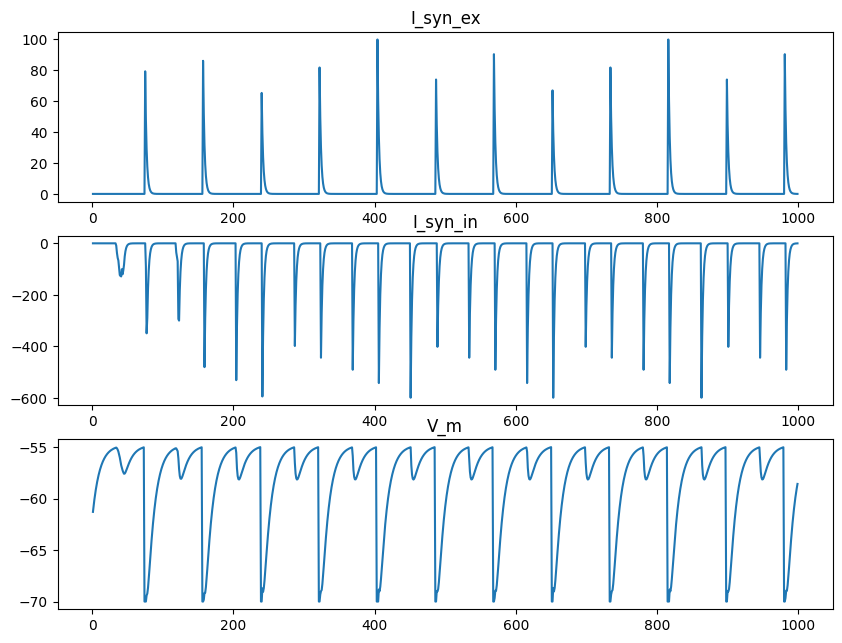

In [49]:
f, axs = plt.subplots(len(recordables),1, figsize = (10,2.5*len(recordables)))
for counter, recordable in enumerate(recordables):
    axs[counter].plot(mm.events['times'],mm.events[recordable])
    axs[counter].set_title(recordable)